<a href="https://colab.research.google.com/github/garfield-gray/Optimization/blob/main/NonConvex/Data_Fitting_%26_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Fitting & Denoising
### Abbas Mohamadiyan
### 810898059

### Auxiliary functions


In [127]:
import cv2
import matplotlib.pyplot as plt

def load_image(path,size = (256,256)):
    img = cv2.imread(path,0)
    img = cv2.resize(img, size)
    return img

def show_image(image):
    plt.imshow(image,cmap='gray')

def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]),eval(x[1])) for x in lines ]

# Q1

### Q1.1

In [128]:
import numpy as np
def Denoise(X, l, o = None): # l stands for Lambda, o stands for order
  x = np.ravel(X, order = o)
  n = len(x)
  I = np.eye(n)
  L = (np.diag(-np.ones(n-1),1)+np.eye(n))[:-1,:]
  LTL = L.T@L
  return np.linalg.solve(I + l * LTL, x)


<Figure size 640x480 with 0 Axes>

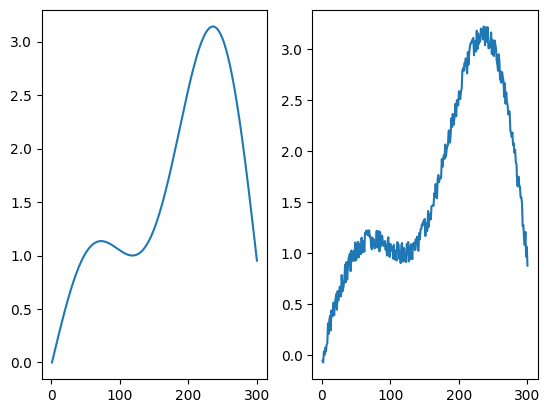

In [129]:
# we shall test our function to see it's working:)
import matplotlib.pyplot as plt
t = np.linspace(0, 4, num = 300)
x = np.sin(t) + t * (np.cos(t)**2)
w = np.arange(1, 301)
b = x + 0.1 * np.sin(10 * w**3)
fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].plot(w, x)
ax[1].plot(w, b)
plt.show()

<Figure size 640x480 with 0 Axes>

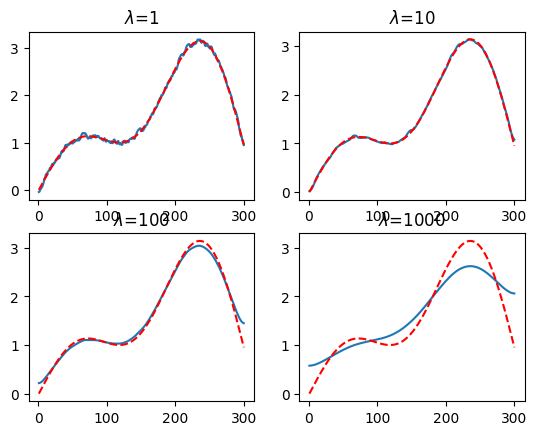

In [130]:
x_rls0 = Denoise(b, 1)
x_rls1 = Denoise(b, 10)
x_rls2 = Denoise(b, 100)
x_rls3 = Denoise(b, 1000)

fig= plt.figure()
fig, ax = plt.subplots(2,2)
ax[0][0].plot(w, x_rls0)
ax[0][0].plot(w, x,'r--')
ax[0][0].title.set_text('$\lambda$=1')
ax[0][1].plot(w, x_rls1)
ax[0][1].plot(w, x,'r--')
ax[0][1].title.set_text('$\lambda$=10')
ax[1][0].plot(w, x_rls2)
ax[1][0].plot(w, x,'r--')
ax[1][0].title.set_text('$\lambda$=100')
ax[1][1].plot(w, x_rls3)
ax[1][1].plot(w, x,'r--')
ax[1][1].title.set_text('$\lambda$=1000')

### Q1.2

In [131]:
# Address of files
%cd /content/drive/MyDrive/Uni/Optimization/NonConvex/NonLinear/DataFittingAndDenoising
!ls

/content/drive/MyDrive/Uni/Optimization/NonConvex/NonLinear/DataFittingAndDenoising
 Data1.txt   Data3.txt	'Data Fitting_&_Denoising.ipynb'   img2.png   img4.png	 img6.png
 Data2.txt   Data4.txt	 img1.png			   img3.png   img5.png


####img1

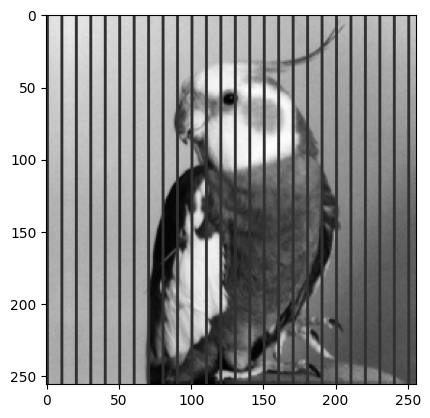

In [132]:
img = cv2.imread("img1.png")
img = cv2.resize(img, (256, 256))
img = img@np.array([1/3,1/3,1/3])
plt.imshow(img[:,:],cmap='gray')
plt.show()

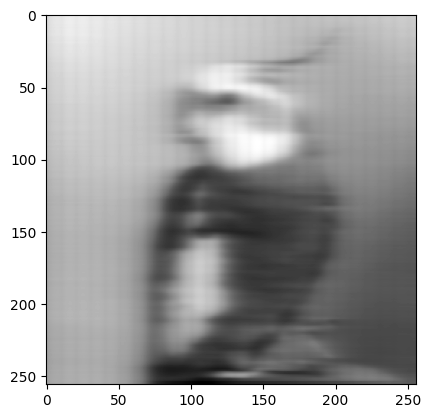

In [133]:
Denoisedimg = np.zeros((256, 256))

for i in range(256):
  Denoisedimg[i:i+1,:] = Denoise(img[i:i+1,:], 100)

plt.imshow(Denoisedimg, cmap='gray')
plt.show()

####img2

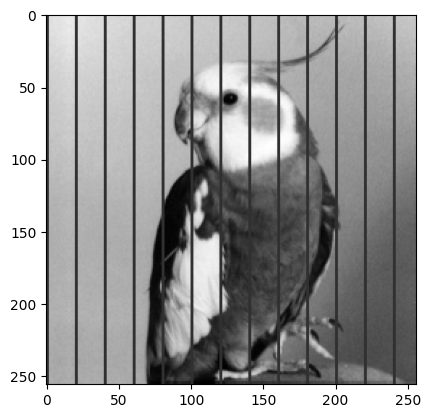

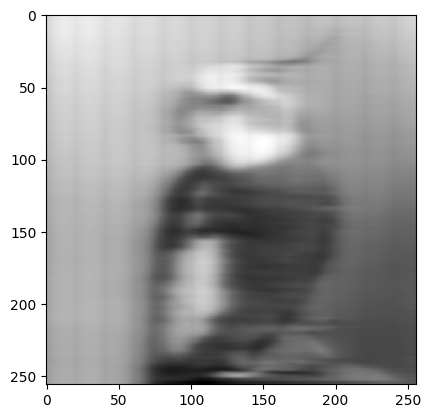

In [134]:
img = cv2.imread("img2.png")
img = cv2.resize(img, (256, 256))
img = img@np.array([1/3,1/3,1/3])
plt.imshow(img[:,:],cmap='gray')
plt.show()

Denoisedimg = np.zeros((256, 256))

for i in range(256):
  Denoisedimg[i:i+1,:] = Denoise(img[i:i+1,:], 100)

plt.imshow(Denoisedimg, cmap='gray')
plt.show()

####img3

<Figure size 640x480 with 0 Axes>

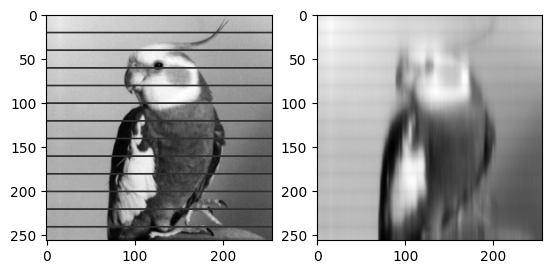

In [135]:
img = cv2.imread("img3.png")
img = cv2.resize(img, (256, 256))
img = img@np.array([1/3,1/3,1/3])

Denoisedimg = np.zeros((256, 256))

for i in range(256):
  Denoisedimg[:,i:i+1] = Denoise(img[:,i:i+1], 100).reshape((256,1))

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img[:,:],cmap='gray')
ax[1].imshow(Denoisedimg,cmap='gray')
plt.show()

####img4

<Figure size 640x480 with 0 Axes>

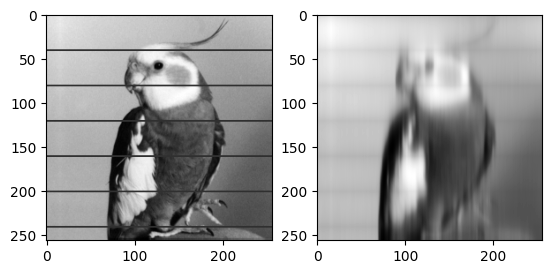

In [136]:
img = cv2.imread("img4.png")
img = cv2.resize(img, (256, 256))
img = img@np.array([1/3,1/3,1/3])

Denoisedimg = np.zeros((256, 256))

for i in range(256):
  Denoisedimg[:,i:i+1] = Denoise(img[:,i:i+1], 100).reshape((256,1))

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img[:,:],cmap='gray')
ax[1].imshow(Denoisedimg,cmap='gray')
plt.show()

####img5

<Figure size 640x480 with 0 Axes>

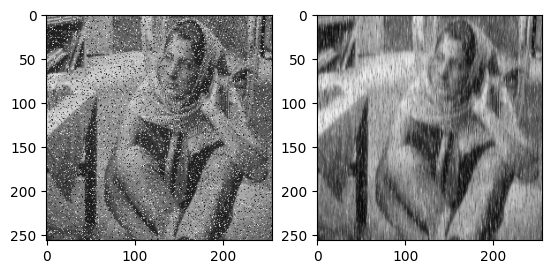

In [137]:
img = cv2.imread("img5.png")
img = cv2.resize(img, (256, 256))
img = img@np.array([1/3,1/3,1/3])

Denoisedimg = np.zeros((256, 256))

for i in range(256):
  Denoisedimg[:,i:i+1] = Denoise(img[:,i:i+1], 5).reshape((256,1))

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img[:,:],cmap='gray')
ax[1].imshow(Denoisedimg,cmap='gray')
plt.show()

####img6

<Figure size 640x480 with 0 Axes>

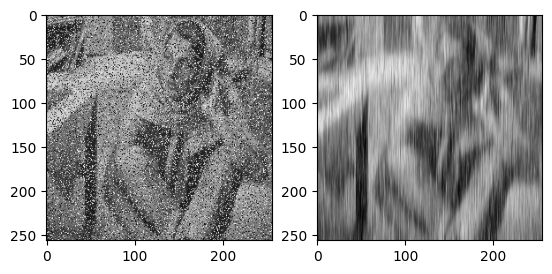

In [139]:
img = cv2.imread("img6.png")
img = cv2.resize(img, (256, 256))
img = img@np.array([1/3,1/3,1/3])

Denoisedimg = np.zeros((256, 256))

for i in range(256):
  Denoisedimg[:,i:i+1] = Denoise(img[:,i:i+1], 50).reshape((256,1))

fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img[:,:],cmap='gray')
ax[1].imshow(Denoisedimg,cmap='gray')
plt.show()

### Q1.3

In [80]:
# no! it's not!
# for periodic noise, it's best to use

### Q1.4

### Q1.5

# Q2

### Q2.1

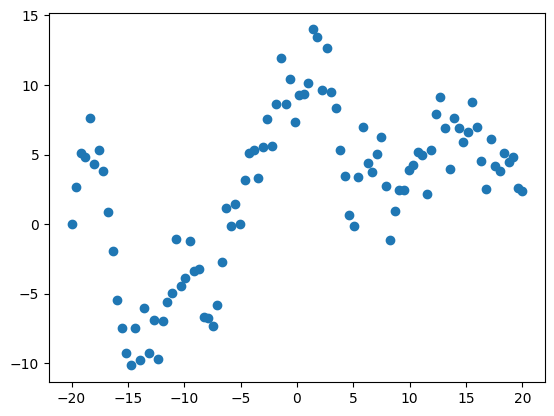

In [81]:
data1 = np.array(load_data('Data1.txt'))
plt.scatter(data1[:,0], data1[:,1])
plt.show()

In [82]:
def Data_Fitting(x, y, deg): #degre is the degre of the polinomial
  v = np.vander(x,deg+1)
  return np.linalg.inv(v.T@v)@v.T@y

In [83]:

print(Data_Fitting(data1[:,0], data1[:,1], 3))
print(np.polyfit(data1[:,0], data1[:,1], 3))

[-1.71693805e-03 -7.83538746e-03  6.73132939e-01  3.58650206e+00]
[-1.71693805e-03 -7.83538746e-03  6.73132939e-01  3.58650206e+00]


### Q2.2

#### Data1

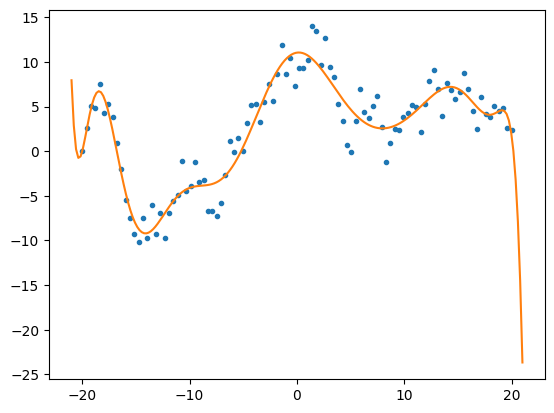

In [84]:
data1 = np.array(load_data('Data1.txt'))
# plt.scatter(data1[:,0], data1[:,1])
# plt.show()
xp = np.linspace(np.min(data1[:,0])-1, np.max(data1[:,0])+1, 2*len(data1[:,0]))
plt.plot(data1[:,0], data1[:,1], '.', xp, np.vander(xp,14)@Data_Fitting(data1[:,0], data1[:,1], 13), '-')

# plt.ylim(-2,2)
plt.show()


#### Data2

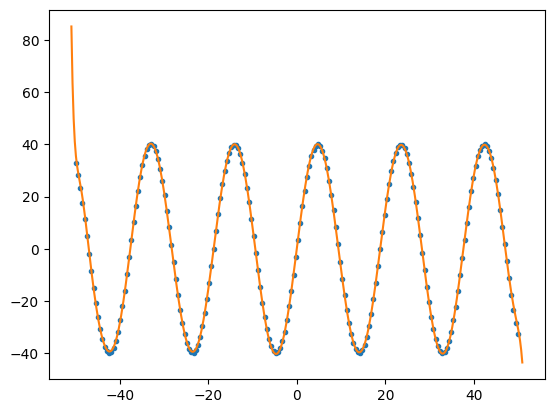

In [85]:
data2 = np.array(load_data('Data2.txt'))
# plt.scatter(data1[:,0], data1[:,1])
# plt.show()
xp = np.linspace(np.min(data2[:,0])-1, np.max(data2[:,0])+1, 2*len(data2[:,0]))
plt.plot(data2[:,0], data2[:,1], '.', xp, np.vander(xp,25)@Data_Fitting(data2[:,0], data2[:,1], 24), '-')

# plt.ylim(-2,2)
plt.show()


### Q2.3

#### Data3

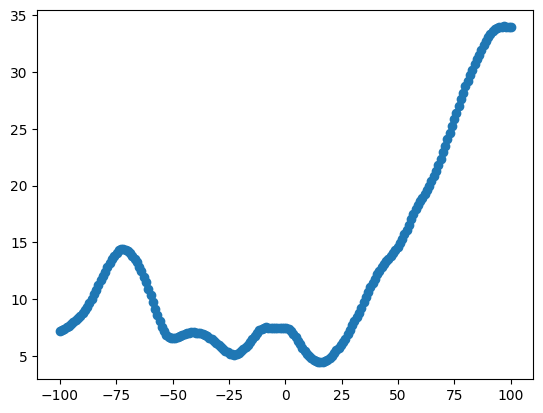

In [121]:
data3 = np.array(load_data('Data3.txt'))
data3 = data3[np.argsort(data3, axis = 0)[:,0]]
Denoiseddata3 = data3
Denoiseddata3[:,1] = Denoise(data3[:,1], 100)
plt.scatter(Denoiseddata3[:,0], Denoiseddata3[:,1])
plt.show()


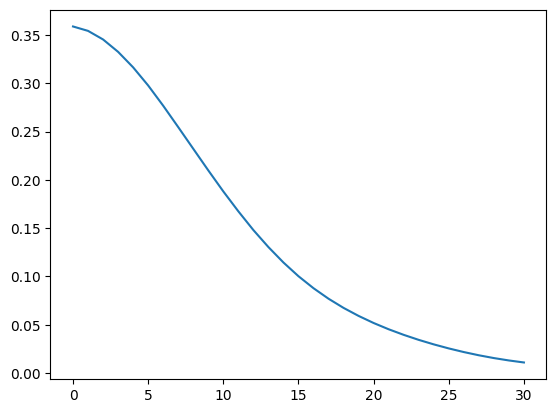

In [125]:
Denoiseddata3 = data3
err = []
for i in range(31):
  Denoiseddata3[:,1] = Denoise(data3[:,1], i)
  y = Denoiseddata3[:,1]
  fx = np.vander(data3[:,0],11)@Data_Fitting(data3[:,0], y, 10)
  err.append(np.sum(np.abs(fx-data3[:,1])))

plt.plot(err)
plt.show()

#### Data4

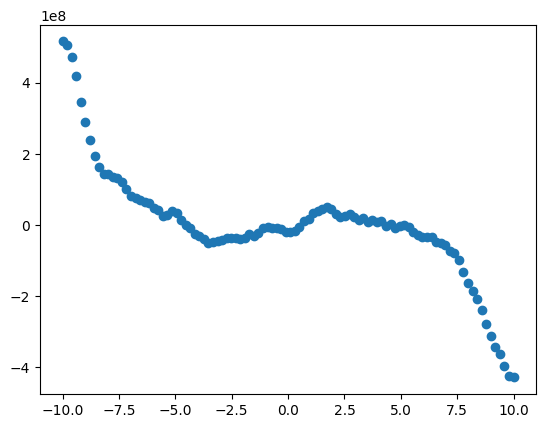

In [124]:
data4 = np.array(load_data('Data4.txt'))
data4 = data4[np.argsort(data4, axis = 0)[:,0]]
Denoiseddata4 = data4
Denoiseddata4[:,1] = Denoise(data4[:,1], 10)
plt.scatter(Denoiseddata4[:,0], Denoiseddata4[:,1])
plt.show()

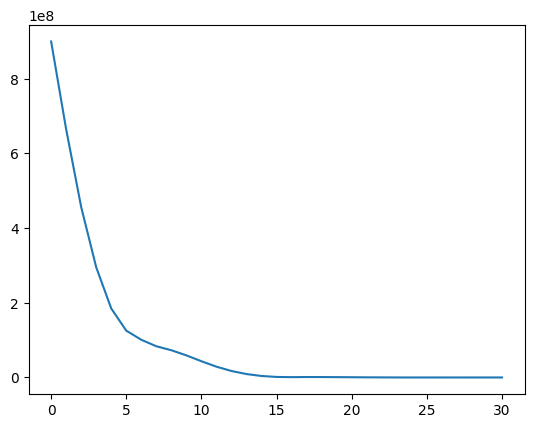

In [126]:
Denoiseddata4 = data4
err = []
for i in range(31):
  Denoiseddata4[:,1] = Denoise(data4[:,1], i)
  y = Denoiseddata4[:,1]
  fx = np.vander(data4[:,0],11)@Data_Fitting(data4[:,0], y, 10)
  err.append(np.sum(np.abs(fx-data4[:,1])))

plt.plot(err)
plt.show()

### Q2.4

###Q2.5